In [1]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
%matplotlib inline
from keras.datasets import mnist
from keras.models import Sequential
from keras.layers import Dense, Dropout, Activation, Flatten
from keras.optimizers import Adam
from keras.layers.normalization import BatchNormalization
from keras.utils import np_utils
from keras.layers import Conv2D, MaxPooling2D, ZeroPadding2D, GlobalAveragePooling2D
from keras.layers.advanced_activations import LeakyReLU 
from keras.preprocessing.image import ImageDataGenerator

np.random.seed(25)

In [2]:
(X_train, y_train), (X_test, y_test) = mnist.load_data()
print("X_train original shape", X_train.shape)
print("y_train original shape", y_train.shape)
print("X_test original shape", X_test.shape)
print("y_test original shape", y_test.shape)

X_train original shape (60000, 28, 28)
y_train original shape (60000,)
X_test original shape (10000, 28, 28)
y_test original shape (10000,)


Text(0.5, 1.0, 'Class 5')

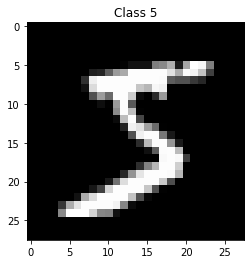

In [3]:
plt.imshow(X_train[0], cmap='gray')
plt.title('Class '+ str(y_train[0]))

In [4]:
X_train = X_train.reshape(X_train.shape[0], 28, 28, 1)
X_test = X_test.reshape(X_test.shape[0], 28, 28, 1)

X_train = X_train.astype('float32')
X_test = X_test.astype('float32')

X_train/=255
X_test/=255

X_train.shape

(60000, 28, 28, 1)

In [5]:
number_of_classes = 10

Y_train = np_utils.to_categorical(y_train, number_of_classes)
Y_test = np_utils.to_categorical(y_test, number_of_classes)

y_train[0], Y_train[0]

(5, array([0., 0., 0., 0., 0., 1., 0., 0., 0., 0.], dtype=float32))

In [6]:
model = Sequential()

model.add(Conv2D(32, (3, 3), input_shape=(28,28,1)))
model.add(Activation('relu'))
BatchNormalization(axis=-1)

model.add(Conv2D(32, (3, 3)))
model.add(Activation('relu'))
model.add(MaxPooling2D(pool_size=(2,2)))
BatchNormalization(axis=-1)

model.add(Conv2D(64,(3, 3)))
model.add(Activation('relu'))
BatchNormalization(axis=-1)


model.add(Flatten())

BatchNormalization()
model.add(Dense(10))
model.add(Activation('softmax'))

In [7]:
model.summary()

Model: "sequential"
_________________________________________________________________
Layer (type)                 Output Shape              Param #   
conv2d (Conv2D)              (None, 26, 26, 32)        320       
_________________________________________________________________
activation (Activation)      (None, 26, 26, 32)        0         
_________________________________________________________________
conv2d_1 (Conv2D)            (None, 24, 24, 32)        9248      
_________________________________________________________________
activation_1 (Activation)    (None, 24, 24, 32)        0         
_________________________________________________________________
max_pooling2d (MaxPooling2D) (None, 12, 12, 32)        0         
_________________________________________________________________
conv2d_2 (Conv2D)            (None, 10, 10, 64)        18496     
_________________________________________________________________
activation_2 (Activation)    (None, 10, 10, 64)        0

In [8]:
model.compile(loss='categorical_crossentropy', optimizer=Adam(), metrics=['accuracy'])

In [9]:
model.load_weights('abc.h5')

In [9]:
model.fit(X_train, Y_train,validation_split=0.1, batch_size=10, epochs=4,verbose=1)

Epoch 1/4
5400/5400 [==============================] - 76s 14ms/step - loss: 0.1017 - accuracy: 0.9691 - val_loss: 0.0562 - val_accuracy: 0.9855
Epoch 2/4
5400/5400 [==============================] - 64s 12ms/step - loss: 0.0389 - accuracy: 0.9877 - val_loss: 0.0389 - val_accuracy: 0.9902
Epoch 3/4
5400/5400 [==============================] - 64s 12ms/step - loss: 0.0269 - accuracy: 0.9912 - val_loss: 0.0392 - val_accuracy: 0.9903
Epoch 4/4
5400/5400 [==============================] - 64s 12ms/step - loss: 0.0189 - accuracy: 0.9941 - val_loss: 0.0309 - val_accuracy: 0.9918


In [10]:
model.save_weights('wt.h5')

In [31]:
score = model.evaluate(X_test, Y_test)
print('Test accuracy: ', score[1])

313/313 [==============================] - 4s 12ms/step - loss: 0.0313 - accuracy: 0.9898

Test accuracy:  0.989799976348877


In [33]:
import keras

l1 norm conv layer 1
 [(22, 0.50989795), (5, 0.6098039), (26, 0.6764363), (16, 0.6816986), (21, 0.71029073), (0, 0.7180866), (1, 0.7294316), (14, 0.8152753), (25, 0.84537804), (19, 0.85747844), (28, 0.86638886), (8, 0.9041151), (18, 0.9174723), (7, 0.963347), (12, 0.9684938), (4, 1.0079188), (30, 1.0356227), (27, 1.0482264), (6, 1.0509502), (13, 1.0588474), (31, 1.0755559), (23, 1.1097866), (24, 1.1354761), (2, 1.14868), (17, 1.2158815), (9, 1.222276), (20, 1.2289324), (15, 1.2747583), (10, 1.3078643), (29, 1.3744755), (3, 1.4117577), (11, 1.493885)]
lets see
[22, 5, 26, 16, 21, 0, 1, 14, 25, 19, 28, 8, 18, 7, 12, 4, 30, 27, 6, 13, 31, 23, 24, 2, 17, 9, 20, 15, 10, 29, 3, 11]
l1 norm conv layer 2
 [(16, 20.84054), (12, 21.353367), (11, 23.719368), (10, 24.634224), (28, 24.829327), (4, 25.009144), (21, 25.606518), (29, 25.657448), (0, 25.938015), (15, 26.242447), (20, 26.527817), (26, 27.071983), (30, 27.182846), (27, 27.245205), (24, 27.767324), (2, 28.186903), (18, 28.266201), (9, 28.

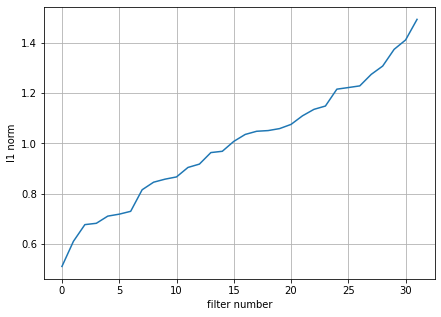

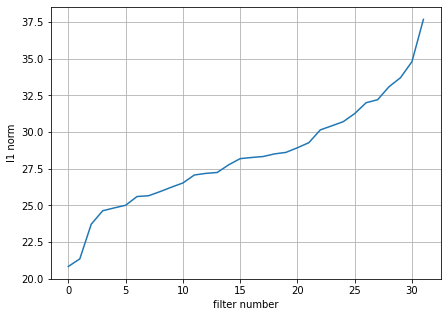

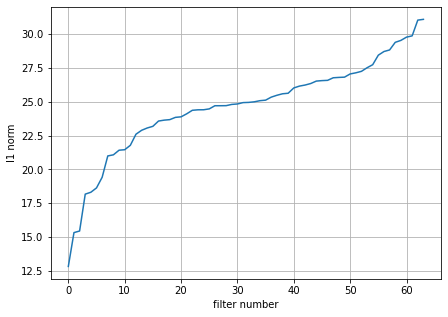

In [22]:
w1=model.layers[0].get_weights()[0]
w2=model.layers[2].get_weights()[0]
w3=model.layers[5].get_weights()[0]
conv_layer_weights=[w1,w2,w3]
c=[[],[],[]]

for i in range(len(conv_layer_weights)):
    weight=conv_layer_weights[i]
    weights_dict={}
    num_filters=len(weight[0,0,0,:])
    
    for j in range(num_filters):
        w_s=np.sum(abs(weight[:,:,:,j]))
        #filt='filt_{}'.format(j)
        filt=j
        weights_dict[filt]=w_s
        
    #weights_dict_sort=sorted(weights_dict.items(),key=lambda kv:kv[i])
    weights_dict_sort=(sorted(weights_dict.items(), key = lambda kv:(kv[1], kv[0]))) 
    print('l1 norm conv layer {}\n'.format(i+1),weights_dict_sort)
    
    weights_value=[]
    for elem in weights_dict_sort:
        weights_value.append(elem[1])
        c[i].append(elem[0])
    xc=range(num_filters)
    
    print('lets see')
    print(c[i])
    
    plt.figure(i+1,figsize=(7,5))
    plt.plot(xc,weights_value)
    plt.xlabel('filter number')
    plt.ylabel('l1 norm')
    plt.grid(True)

In [23]:
from kerassurgeon import identify

In [24]:
from kerassurgeon.operations import delete_channels,delete_layer


In [43]:
from kerassurgeon import Surgeon
d1=16
d2=16
d3=40

layer_0=model.layers[0]
layer_2=model.layers[2]
layer_5=model.layers[5]
surgeon=Surgeon(model)
surgeon.add_job('delete_channels',layer_0,channels=c[0][:d1])
surgeon.add_job('delete_channels',layer_2,channels=c[0][:d2])
surgeon.add_job('delete_channels',layer_5,channels=c[0][:d3])
new_model=surgeon.operate()
new_model.compile(loss='categorical_crossentropy', optimizer=Adam(), metrics=['accuracy'])

Deleting 16/32 channels from layer: conv2d
Deleting 16/32 channels from layer: conv2d_1
Deleting 32/64 channels from layer: conv2d_2


In [44]:
new_model.save_weights('wt_new.h5')

In [45]:
score = new_model.evaluate(X_test, Y_test)
print('Test accuracy: ', score[1])

313/313 [==============================] - 2s 7ms/step - loss: 0.5593 - accuracy: 0.9545

Test accuracy:  0.9545000195503235
